In [1]:
import pandas as pd
import numpy as np

In [4]:
#df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databasees/wine/wine.data',header = None)
df_wine = pd.read_csv('wine.data',header = None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']

print('Class Labels',df_wine['Class label'].unique())
df_wine.head()

Class Labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
from sklearn.model_selection import train_test_split

X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.55,
                                                   random_state = 0,
                                                   stratify = y)

### 1. Multiclass Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

mlr = LogisticRegression(penalty = 'none',max_iter = 300).fit(X_train,y_train)

In [9]:
mlr.predict(X_test[0:5,:])

array([2, 2, 3, 2, 3], dtype=int64)

In [11]:
mlr.predict_proba(X_test[0:5,:])

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [12]:
y_test[0:5]

array([2, 2, 3, 2, 3], dtype=int64)

In [13]:
mlr.score(X_test,y_test)

0.9693877551020408

### 2. Linear Discriminant Analysis

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X_train,y_train)
lda.predict(X_test[0:5,:])

array([2, 2, 3, 2, 3], dtype=int64)

In [15]:
lda.predict_proba(X_test[0:5,:])

array([[3.33963584e-09, 9.99999990e-01, 7.05470498e-09],
       [3.59845788e-05, 9.99903808e-01, 6.02072480e-05],
       [7.68772943e-08, 5.71137120e-05, 9.99942809e-01],
       [3.73169552e-06, 9.99996236e-01, 3.20868500e-08],
       [7.75250594e-11, 1.44702689e-06, 9.99998553e-01]])

In [16]:
lda.score(X_test,y_test)

0.9591836734693877

### 3. ROC Curve

In [22]:
df_spam = pd.read_csv("spambase.data", header = None)

In [23]:
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

In [24]:
np.sum(df_spam.iloc[:,-1] == 0) ## Number of non-spam emails

2788

In [25]:
np.sum(df_spam.iloc[:,-1] == 1) ## Number of spam emails

1813

In [26]:
df_spam.shape

(4601, 58)

In [27]:
X,y = df_spam.iloc[:,0:57].values, df_spam.iloc[:,57].values

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.2,
                                                   random_state = 20,
                                                   stratify = y)

In [28]:
mlr_spam = LogisticRegression(penalty = 'none',max_iter = 10000).fit(X_train,y_train)
mlr_spam.score(X_test,y_test)

0.9391965255157437

In [29]:
mlr_spam.predict(X_test[0:5,:])

array([1, 0, 0, 0, 0], dtype=int64)

In [30]:
mlr_spam.predict_proba(X_test[0:5,:])

array([[3.71545617e-01, 6.28454383e-01],
       [1.00000000e+00, 4.87336728e-19],
       [9.37279977e-01, 6.27200230e-02],
       [7.98020931e-01, 2.01979069e-01],
       [1.00000000e+00, 2.04772522e-10]])

In [32]:
mlr_spam_prob = mlr_spam.predict_proba(X_test)
mlr_spam_prob1 = mlr_spam_prob[:,1]
np.max(mlr_spam_prob1)

1.0

In [33]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
fpr,tpr,threshold = roc_curve(y_test,mlr_spam_prob1)

In [34]:
from sklearn.metrics import auc
roc_auc = auc(fpr,tpr)
roc_auc

0.9786624801287558

<Figure size 432x288 with 0 Axes>

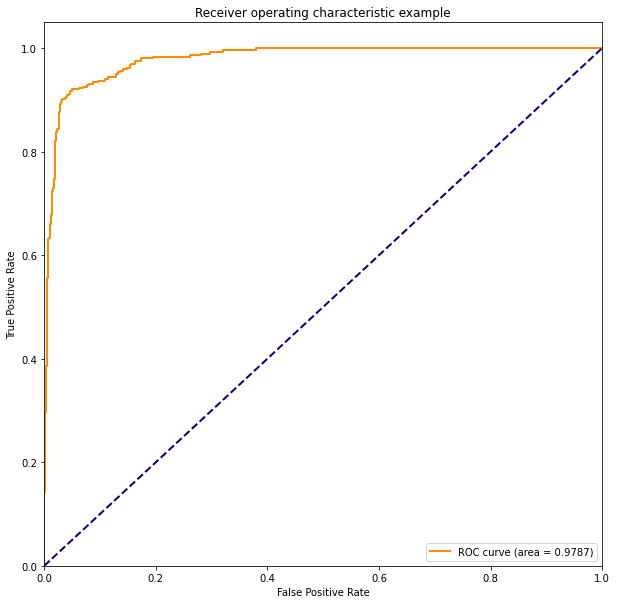

In [35]:
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # lw is linewidth
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()